##### 1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 


In [51]:
# Initial Set-Up
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from numpy import mean, std
from sklearn.metrics import accuracy_score
from sklearn import metrics
from statsmodels.formula.api import logit
from sklearn.neighbors import KNeighborsClassifier

#### Pre-Processing:

In [2]:
# Create bottle df
bottle = pd.read_csv('bottle.csv')
bottle_df = pd.DataFrame(bottle)
print(bottle_df.head())
bottle_df.shape

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

(864863, 74)

In [3]:
# Create cast df
cast = pd.read_csv('cast.csv')
cast_df = pd.DataFrame(cast)
print(cast_df.head())
cast_df.shape

   Cst_Cnt          Cruise_ID  Cruise        Cruz_Sta  DbSta_ID  \
0        1  1949-03-01-C-31CR  194903  19490305400560   5400560   
1        2  1949-03-01-C-31CR  194903  19490305200750   5200750   
2        3  1949-03-01-C-31CR  194903  19490305100850   5100850   
3        4  1949-03-01-C-31CR  194903  19490305000950   5000950   
4        5  1949-03-01-C-31CR  194903  19490305001040   5001040   

                          Cast_ID       Sta_ID  Quarter Sta_Code  Distance  \
0  19-4903CR-HY-060-0930-05400560  054.0 056.0        1      NST       NaN   
1  19-4903CR-HY-060-2112-05200750  052.0 075.0        1      NST       NaN   
2  19-4903CR-HY-061-0354-05100850  051.0 085.0        1      NST       NaN   
3  19-4903CR-HY-061-1042-05000950  050.0 095.0        1      NST       NaN   
4  19-4903CR-HY-061-1706-05001040  050.0 104.0        1      NST       NaN   

   ... Wave_Prd  Wind_Dir  Wind_Spd  Barometer  Dry_T Wet_T  Wea  Cloud_Typ  \
0  ...      NaN      23.0      18.0        NaN   

(34404, 61)

In [4]:
# Merge bottle and cast dfs.
merged_df = pd.merge(bottle_df, cast_df, on=["Cst_Cnt", "Sta_ID"])
print(merged_df.head())
merged_df.shape

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  Wave_Prd  Wind_Dir  \
0       0   10.50  33.440     NaN  25.649    NaN  ...       NaN      23.0   
1       8   10.46  33.440     NaN  25.656    NaN  ...       NaN      23.0   
2      10   10.46  33.437     NaN  25.654    NaN  ...       NaN      23.0   
3      19   10.45  33.420     NaN  25.643    NaN  ...       NaN      23.0   
4      20   10.45  33.421     NaN  25.643    NaN  ...       NaN      23.0   

   Wind_Spd  Barometer  Dry_T  Wet_T  Wea  Cloud_Typ  Cloud_Amt  Visibility  
0 

(864863, 133)

In [5]:
# Drop features with more than 80% null values
pct_null = merged_df.isnull().sum()/len (merged_df)
missing_features = pct_null[pct_null > 0.80].index 
merged_df.drop(missing_features, axis=1, inplace=True)
print(merged_df.head())
merged_df.shape

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  Wave_Prd  Wind_Dir  \
0       0   10.50  33.440     NaN  25.649    NaN  ...       NaN      23.0   
1       8   10.46  33.440     NaN  25.656    NaN  ...       NaN      23.0   
2      10   10.46  33.437     NaN  25.654    NaN  ...       NaN      23.0   
3      19   10.45  33.420     NaN  25.643    NaN  ...       NaN      23.0   
4      20   10.45  33.421     NaN  25.643    NaN  ...       NaN      23.0   

   Wind_Spd  Barometer  Dry_T  Wet_T  Wea  Cloud_Typ  Cloud_Amt  Visibility  
0 

(864863, 100)

In [6]:
# Search for categorical features in the dataframe
df_cat = merged_df.select_dtypes('object').columns
print(df_cat)

Index(['Sta_ID', 'Depth_ID', 'Cruise_ID', 'Cast_ID', 'Sta_Code', 'Date',
       'Time', 'Lat_Hem', 'Lon_Hem', 'Ship_Name', 'Ship_Code', 'Data_Type',
       'Orig_Sta_ID', 'Data_Or', 'Cruz_Num'],
      dtype='object')


In [7]:
# Drop categorical features
num_df=merged_df.drop(df_cat, axis = 1)
print(num_df.head())
num_df.shape

   Cst_Cnt  Btl_Cnt  Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  \
0        1        1       0   10.50  33.440     NaN  25.649    NaN   
1        1        2       8   10.46  33.440     NaN  25.656    NaN   
2        1        3      10   10.46  33.437     NaN  25.654    NaN   
3        1        4      19   10.45  33.420     NaN  25.643    NaN   
4        1        5      20   10.45  33.421     NaN  25.643    NaN   

   Oxy_µmol/Kg  RecInd  ...  Wave_Prd  Wind_Dir  Wind_Spd  Barometer  Dry_T  \
0          NaN       3  ...       NaN      23.0      18.0        NaN    NaN   
1          NaN       3  ...       NaN      23.0      18.0        NaN    NaN   
2          NaN       7  ...       NaN      23.0      18.0        NaN    NaN   
3          NaN       3  ...       NaN      23.0      18.0        NaN    NaN   
4          NaN       7  ...       NaN      23.0      18.0        NaN    NaN   

   Wet_T  Wea  Cloud_Typ  Cloud_Amt  Visibility  
0    NaN  2.0        NaN        NaN         NaN  
1   

(864863, 85)

In [8]:
# Impute missing data for remaining features
columns = num_df.columns
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(num_df)
imp_df = imp.transform(num_df)
filled_df = pd.DataFrame(imp_df)
filled_df.columns = columns
filled_df.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1.0,1.0,0.0,10.50,33.440,3.392468,25.649,57.103779,148.808694,3.0,...,6.522719,23.0,18.0,1016.444375,16.265046,14.436088,2.0,5.67912,5.065558,6.815861
1,1.0,2.0,8.0,10.46,33.440,3.392468,25.656,57.103779,148.808694,3.0,...,6.522719,23.0,18.0,1016.444375,16.265046,14.436088,2.0,5.67912,5.065558,6.815861
2,1.0,3.0,10.0,10.46,33.437,3.392468,25.654,57.103779,148.808694,7.0,...,6.522719,23.0,18.0,1016.444375,16.265046,14.436088,2.0,5.67912,5.065558,6.815861
3,1.0,4.0,19.0,10.45,33.420,3.392468,25.643,57.103779,148.808694,3.0,...,6.522719,23.0,18.0,1016.444375,16.265046,14.436088,2.0,5.67912,5.065558,6.815861
4,1.0,5.0,20.0,10.45,33.421,3.392468,25.643,57.103779,148.808694,7.0,...,6.522719,23.0,18.0,1016.444375,16.265046,14.436088,2.0,5.67912,5.065558,6.815861


In [9]:
corr_df = filled_df.corr()

##### 2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?


In [10]:
# Identify features with little correlation to temperature
drop_feat = []
keep_feat = []

labels = list(corr_df.index)

for i in range(len(corr_df)):
    # Identify features with little correlation to temperature
    if abs(corr_df["T_degC"][i]) <= 0.5:
        drop_feat.append(labels[i])
    # Identify features with strong correlation to temperature
    else:
        keep_feat.append(labels[i])

print("Features to Drop: ", drop_feat)
print("Features to Keep: ", keep_feat)

Features to Drop:  ['Cst_Cnt', 'Btl_Cnt', 'Salnty', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'O_qual', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3q', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_SALINITY', 'R_SIO3', 'R_NO2', 'R_CHLA', 'R_PHAEO', 'Cruise', 'Cruz_Sta', 'DbSta_ID', 'Quarter', 'Distance', 'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Lat_Dec', 'Lat_Deg', 'Lat_Min', 'Lon_Dec', 'Lon_Deg', 'Lon_Min', 'Rpt_Line', 'St_Line', 'Ac_Line', 'Rpt_Sta', 'St_Station', 'Ac_Sta', 'Bottom_D', 'Order_Occ', 'Event_Num', 'IntChl', 'Wave_Dir', 'Wave_Ht', 'Wave_Prd', 'Wind_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility']
Features to Keep:  ['Depthm', 'T_degC', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM', 'NO3uM', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PO4', 'R_NO3', 'R_PRES']


In [11]:
corr_df.drop(drop_feat, axis = 1, inplace = True)
corr_df.drop(drop_feat, axis = 0, inplace = True)
print(corr_df)

               Depthm    T_degC    O2ml_L    STheta     O2Sat  Oxy_µmol/Kg  \
Depthm       1.000000 -0.678628 -0.532769  0.551689 -0.512682    -0.507193   
T_degC      -0.678628  1.000000  0.712731 -0.804295  0.745131     0.696899   
O2ml_L      -0.532769  0.712731  1.000000 -0.674994  0.965814     0.972406   
STheta       0.551689 -0.804295 -0.674994  1.000000 -0.724045    -0.694328   
O2Sat       -0.512682  0.745131  0.965814 -0.724045  1.000000     0.993336   
Oxy_µmol/Kg -0.507193  0.696899  0.972406 -0.694328  0.993336     1.000000   
PO4uM        0.422833 -0.602995 -0.734305  0.550374 -0.725289    -0.716162   
NO3uM        0.304036 -0.522177 -0.644935  0.502068 -0.667413    -0.655559   
R_Depth      1.000000 -0.678626 -0.532769  0.551690 -0.512682    -0.507193   
R_TEMP      -0.678628  1.000000  0.712731 -0.804296  0.745131     0.696899   
R_POTEMP    -0.643655  0.973582  0.698049 -0.828138  0.764176     0.714954   
R_SIGMA      0.570964 -0.836170 -0.698859  0.958597 -0.749903   

In [12]:
corr_df.shape

(19, 19)

In [13]:
# Reduce filled_df to 18 remaining features & target
filled_df.drop(drop_feat, axis = 1, inplace = True)
filled_df

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,NO3uM,R_Depth,R_TEMP,R_POTEMP,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PO4,R_NO3,R_PRES
0,0.0,10.500,3.392468,25.64900,57.103779,148.808694,1.564747,17.302247,0.0,10.50,10.50,25.640,233.0,0.000,3.392498,57.19294,1.564736,17.302188,0.0
1,8.0,10.460,3.392468,25.65600,57.103779,148.808694,1.564747,17.302247,8.0,10.46,10.46,25.650,232.5,0.010,3.392498,57.19294,1.564736,17.302188,8.0
2,10.0,10.460,3.392468,25.65400,57.103779,148.808694,1.564747,17.302247,10.0,10.46,10.46,25.650,232.8,0.020,3.392498,57.19294,1.564736,17.302188,10.0
3,19.0,10.450,3.392468,25.64300,57.103779,148.808694,1.564747,17.302247,19.0,10.45,10.45,25.640,234.1,0.040,3.392498,57.19294,1.564736,17.302188,19.0
4,20.0,10.450,3.392468,25.64300,57.103779,148.808694,1.564747,17.302247,20.0,10.45,10.45,25.640,234.0,0.040,3.392498,57.19294,1.564736,17.302188,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,0.0,18.744,5.805000,23.87055,108.740000,253.470000,0.220000,0.100000,0.0,18.74,18.74,23.871,402.4,0.000,5.810000,108.70000,0.220000,0.100000,0.0
864859,2.0,18.744,5.805000,23.87072,108.740000,253.470000,0.220000,0.100000,2.0,18.74,18.74,23.871,402.5,0.008,5.810000,108.70000,0.220000,0.100000,2.0
864860,5.0,18.692,5.796000,23.88911,108.460000,253.060000,0.200000,0.090000,5.0,18.69,18.69,23.889,400.8,0.020,5.800000,108.50000,0.200000,0.100000,5.0
864861,10.0,18.161,5.816000,24.01426,107.740000,253.920000,0.250000,0.110000,10.0,18.16,18.16,24.014,389.1,0.040,5.820000,107.70000,0.250000,0.100000,10.0


In [14]:
# Manually drop superfluous columns (whose values match another column)
superfluous = ["R_Depth", "R_TEMP", "R_POTEMP", "R_SIGMA", "R_O2", "R_O2Sat", "R_PO4", "R_NO3", "R_PRES"]
select_df=filled_df.drop(superfluous, axis = 1)
select_df.head()

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,NO3uM,R_SVA,R_DYNHT
0,0.0,10.50,3.392468,25.649,57.103779,148.808694,1.564747,17.302247,233.0,0.00
1,8.0,10.46,3.392468,25.656,57.103779,148.808694,1.564747,17.302247,232.5,0.01
2,10.0,10.46,3.392468,25.654,57.103779,148.808694,1.564747,17.302247,232.8,0.02
3,19.0,10.45,3.392468,25.643,57.103779,148.808694,1.564747,17.302247,234.1,0.04
4,20.0,10.45,3.392468,25.643,57.103779,148.808694,1.564747,17.302247,234.0,0.04


In [15]:
corr_df.drop(superfluous, axis = 1, inplace = True)
corr_df.drop(superfluous, axis = 0, inplace = True)
print(corr_df)

               Depthm    T_degC    O2ml_L    STheta     O2Sat  Oxy_µmol/Kg  \
Depthm       1.000000 -0.678628 -0.532769  0.551689 -0.512682    -0.507193   
T_degC      -0.678628  1.000000  0.712731 -0.804295  0.745131     0.696899   
O2ml_L      -0.532769  0.712731  1.000000 -0.674994  0.965814     0.972406   
STheta       0.551689 -0.804295 -0.674994  1.000000 -0.724045    -0.694328   
O2Sat       -0.512682  0.745131  0.965814 -0.724045  1.000000     0.993336   
Oxy_µmol/Kg -0.507193  0.696899  0.972406 -0.694328  0.993336     1.000000   
PO4uM        0.422833 -0.602995 -0.734305  0.550374 -0.725289    -0.716162   
NO3uM        0.304036 -0.522177 -0.644935  0.502068 -0.667413    -0.655559   
R_SVA       -0.630283  0.935155  0.777514 -0.860015  0.835317     0.799428   
R_DYNHT      0.855839 -0.774224 -0.671612  0.696870 -0.691644    -0.684225   

                PO4uM     NO3uM     R_SVA   R_DYNHT  
Depthm       0.422833  0.304036 -0.630283  0.855839  
T_degC      -0.602995 -0.522177  

<AxesSubplot:>

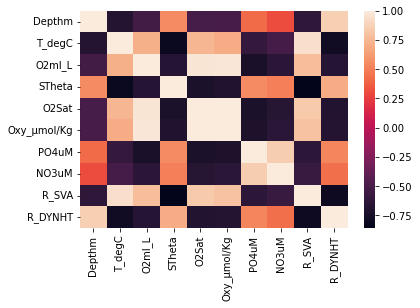

In [16]:
sns.heatmap(corr_df)

In [17]:
# Normalize/Standardize
features = select_df.columns
scaler = StandardScaler().fit(select_df)
scaled = scaler.transform(select_df)
scaled_df=pd.DataFrame(scaled)
scaled_df.columns = features
scaled_df

,Depthm,T_degC,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,PO4uM,NO3uM,R_SVA,R_DYNHT
0,-0.717709,-0.071067,-4.774785e-16,-0.150570,4.381252e-16,-3.604034e-16,3.100467e-16,0.000000,0.133144,-1.161028
1,-0.692396,-0.080552,-4.774785e-16,-0.144385,4.381252e-16,-3.604034e-16,3.100467e-16,0.000000,0.127624,-1.134138
2,-0.686068,-0.080552,-4.774785e-16,-0.146152,4.381252e-16,-3.604034e-16,3.100467e-16,0.000000,0.130936,-1.107247
3,-0.657592,-0.082924,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,3.100467e-16,0.000000,0.145287,-1.053467
4,-0.654428,-0.082924,-4.774785e-16,-0.155872,4.381252e-16,-3.604034e-16,3.100467e-16,0.000000,0.144183,-1.053467
...,...,...,...,...,...,...,...,...,...,...
864858,-0.717709,1.883952,1.296960e+00,-1.722117,1.591961e+00,1.327165e+00,-1.877705e+00,-1.888727,2.003175,-1.161028
864859,-0.711381,1.883952,1.296960e+00,-1.721967,1.591961e+00,1.327165e+00,-1.877705e+00,-1.888727,2.004279,-1.139516
864860,-0.701889,1.871621,1.292122e+00,-1.705717,1.583329e+00,1.321966e+00,-1.905632e+00,-1.889825,1.985512,-1.107247
864861,-0.686068,1.745697,1.302874e+00,-1.595126,1.561131e+00,1.332871e+00,-1.835815e+00,-1.887629,1.856354,-1.053467


In [18]:
# Use RFE to analyze remaining 9 features

# Find best number of features to select for RFE
X = scaled_df.drop("T_degC", axis=1)
y = np.array(scaled_df["T_degC"]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [19]:
# Build a dictionary of performance scores for each scenario
accuracy = {}
for i in range(1,10):
    est=LinearRegression()
    model=RFE(est, n_features_to_select=i)
    model.fit(X_train, y_train)
    accuracy.update({i:model.score(X_test, y_test)})

# Find number of features (n) with highest accuracy
max_kv = max(accuracy, key=accuracy.get)
print(max_kv)

8


In [20]:
# Perform RFE using 8 features selected
new_model=RFE(est, n_features_to_select=8)
new_model.fit(X_train,y_train)

select_features = []
# summarize all features
for i in range(X.shape[1]):
    if new_model.ranking_[i]==1:
        select_features.append(X.columns[i])

select_features

['Depthm',
 'O2ml_L',
 'O2Sat',
 'Oxy_µmol/Kg',
 'PO4uM',
 'NO3uM',
 'R_SVA',
 'R_DYNHT']

##### 3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 


In [21]:
X = select_df[select_features]
y = np.array(select_df["T_degC"]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Variance score: ', model.score(X_test, y_test))
print('Coefficients: ', model.coef_)

Variance score:  0.9283709091749277
Coefficients:  [[-0.00209257  1.16876342  0.18596897 -0.10352873 -0.19437841  0.01344631
   0.03691183  0.12645481]]


I saw that intercept was part of the .params output for OLS and logistic regression, but .params is not a method for linear regression, so here's my best understanding of the resulting equation:

T_degC = -0.002*Depthm + 1.17*O2ml_L + 0.186*O2Sat - 0.104*Oxy_µmol/Kg - 0.194*PO4uM + 0.013*NO3uM + 0.037*R_SVA + 0.126*R_DYNHT

Since the variance score is close to 1, this appears to be a well-performing model.

##### 4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.


Multivariable linear regression had a much better performance than just a single variable approach.  The variance score for water temperature versus salinity was only 0.46.  The variance score doubled when I used RFE and multi-variable linear regression.

##### 5.	Work with the diabetes dataset to perform multiple logistic regression. 


In [22]:
diabetes = pd.read_csv("../wk_13_hmwk/diabetes.csv")
diabetes_df = pd.DataFrame(diabetes)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
X = diabetes_df.drop("Outcome", axis = 1)
y = np.array(diabetes_df["Outcome"]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Variance score: ', model.score(X_test, y_test))
print('Coefficients: ', model.coef_)

Variance score:  0.8181818181818182
Coefficients:  [[ 8.98831100e-02  3.32959891e-02 -1.47167157e-02 -4.21783949e-03
  -8.44449642e-04  9.45117678e-02  1.43007577e+00  1.28476980e-02]]


##### 6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 


We can assess both the precision and the recall of the model in addition to accuracy.  Since we are diagnosing a disease, recall matters the most here because we want to minimize false negatives.

In [38]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8032786885245902
Recall: 0.620253164556962


##### 7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.


In [49]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', model.score(X_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7359307359307359
Precision: 0.5882352941176471
Recall: 0.759493670886076


I experimented with several of the parameters available in the documentation, but the one that gave a marked increase in recall was setting class_weight to 'balanced.'  This caused recall to increase from 62% to 76%.

##### 8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 


In [59]:
model = KNeighborsClassifier(weights='distance')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy: ', model.score(X_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7532467532467533
Precision: 0.6617647058823529
Recall: 0.569620253164557


I wish I had a more sophisticated answer to this question, but I can only say that multiple logistic regression is more performant that KNN for this dataset because I ran both and compared recall.  I hypertuned the weights parameter on the KNN model, but the best recall score I could muster was 57%.  At 76% recall, the multiple logistic regression is the clear winner.

## DataCamp

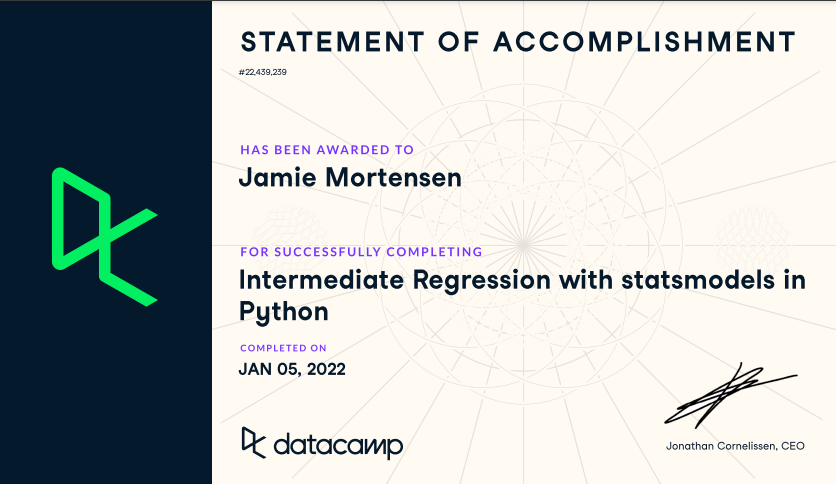